In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
crop = pd.read_csv('crop_yield.csv')

In [3]:
crop.head(7)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073.0,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.0,1507.0,2051.4,283511.43,923.49,0.465455


In [4]:
crop.shape

(19725, 10)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19725 entries, 0 to 19724
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19725 non-null  object 
 1   Crop_Year        19725 non-null  int64  
 2   Season           19725 non-null  object 
 3   State            19725 non-null  object 
 4   Area             19721 non-null  float64
 5   Production       19721 non-null  float64
 6   Annual_Rainfall  19720 non-null  float64
 7   Fertilizer       19721 non-null  float64
 8   Pesticide        19720 non-null  float64
 9   Yield            19725 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [6]:
crop.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               4
Production         4
Annual_Rainfall    5
Fertilizer         4
Pesticide          5
Yield              0
dtype: int64

In [7]:
crop['Annual_Rainfall'] = crop.groupby('State')['Annual_Rainfall'].transform(lambda x: x.fillna(x.mode()[0]))

In [8]:
crop['Fertilizer'].fillna(crop['Fertilizer'].mean(), inplace=True)

In [9]:
crop['Pesticide'].fillna(crop['Pesticide'].median(), inplace=True)

In [10]:
crop.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               4
Production         4
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [11]:
crop.dropna(subset=['Area'], inplace=True)

In [12]:
crop_data = crop.dropna()
crop_data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19720,Small millets,1998,Kharif,Nagaland,4000.0,2000.0,1498.0,395200.00,1160.00,0.500000
19721,Wheat,1998,Rabi,Nagaland,1000.0,3000.0,1498.0,98800.00,290.00,3.000000
19722,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900.0,1356.2,29586735.11,96373.73,1.285000
19723,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488.0,1356.2,26242746.82,85481.26,0.016667


In [13]:
crop.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         4
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [14]:
crop.select_dtypes(include=['int64'])

,Crop_Year
0,1997
1,1997
2,1997
3,1997
4,1997
...,...
19720,1998
19721,1998
19722,1997
19723,1997


In [15]:
crop.select_dtypes(include=['object'])

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(lint),Kharif,Assam
...,...,...,...
19720,Small millets,Kharif,Nagaland
19721,Wheat,Rabi,Nagaland
19722,Maize,Kharif,Jammu and Kashmir
19723,Rice,Kharif,Jammu and Kashmir


In [1]:
crop.duplicated().sum()

NameError: name 'crop' is not defined

In [17]:
crop.drop_duplicates(inplace=True)

In [18]:
crop.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19704.000000,1.970400e+04,1.970000e+04,19704.000000,1.970400e+04,1.970400e+04,19704.000000
mean,2009.122310,1.798443e+05,1.642678e+07,1437.788355,2.409513e+07,4.882709e+04,79.897127
std,6.501255,7.325811e+05,2.629837e+08,817.042573,9.491219e+07,2.132160e+05,877.974273
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.392000e+03,1.393000e+03,940.700000,1.884450e+05,3.573450e+02,0.600000
50%,2010.000000,9.316500e+03,1.380350e+04,1247.600000,1.236489e+06,2.422380e+03,1.030000
75%,2015.000000,7.504850e+04,1.225832e+05,1643.700000,1.001149e+07,2.001397e+04,2.387579
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [19]:
crop_values = crop['Crop'].unique()
print(len(crop_values), crop_values)



55 ['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']


In [20]:
Maximum_Rainfall_in_Karnataka = crop[crop['State'] == 'Karnataka']['Annual_Rainfall'].max()
Maximum_Rainfall_in_Karnataka

1422.3

In [21]:
correlation = crop['Production'].corr(crop['Area'])
correlation

0.03744813759016204

In [22]:
correlation = crop['Annual_Rainfall'].corr(crop['Production'])
correlation

0.029853544987868803

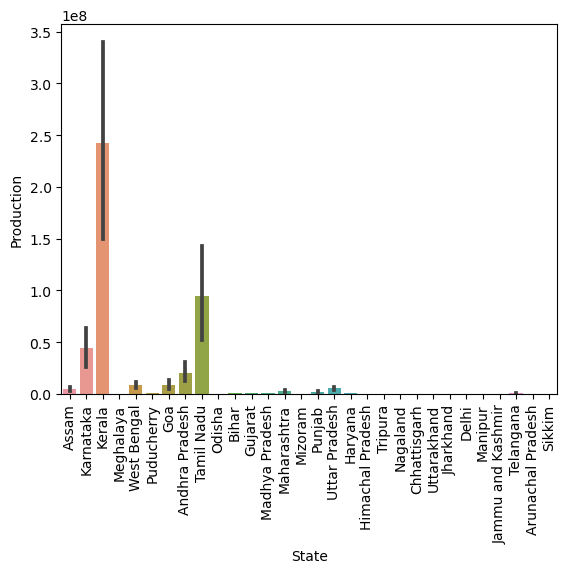

In [23]:

sns.barplot(x=crop["State"], y=crop["Production"])
plt.xticks(rotation=90)
plt.show()

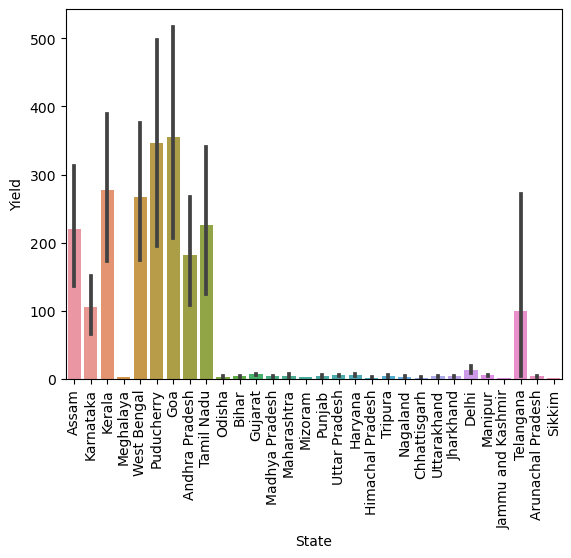

In [24]:
sns.barplot(x=crop["State"], y=crop["Yield"])
plt.xticks(rotation=90)
plt.show()

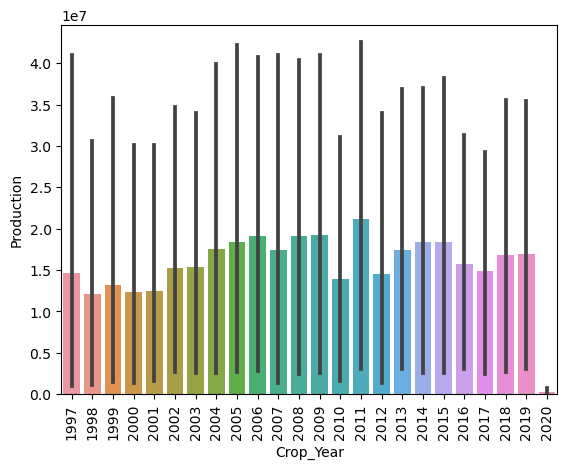

In [25]:
sns.barplot(x=crop["Crop_Year"], y=crop["Production"])
plt.xticks(rotation=90)
plt.show()

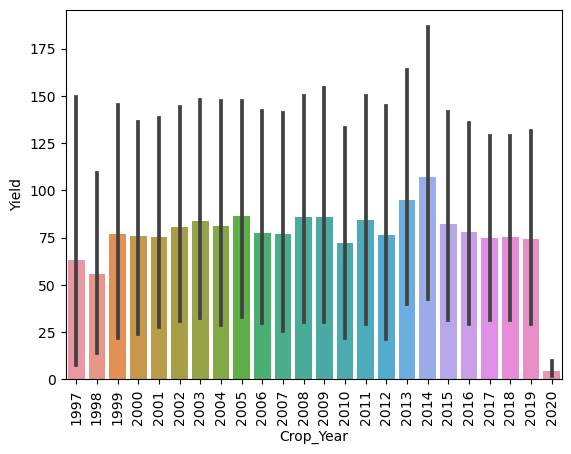

In [26]:
sns.barplot(x=crop["Crop_Year"], y=crop["Yield"])
plt.xticks(rotation=90)
plt.show()

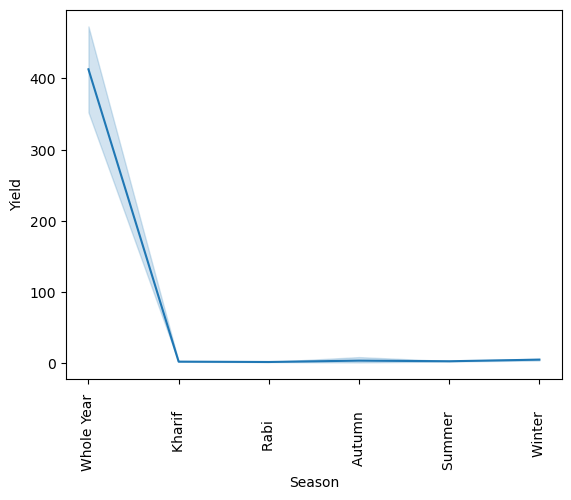

In [27]:
sns.lineplot(x=crop["Season"], y=crop["Yield"])
plt.xticks(rotation=90)
plt.show()

In [28]:
# DATA VISUALIZATION FOR WHEAT CROP

In [29]:
wheat_data = crop[crop["Crop"]=="Wheat"]
wheat_data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
26,Wheat,1997,Rabi,Assam,84698.0,110054.0,2051.4,8060708.66,26256.38,1.259524
59,Wheat,1997,Rabi,Karnataka,250698.0,118512.0,1266.7,23858928.66,77716.38,0.548333
94,Wheat,1997,Rabi,Meghalaya,4287.0,6894.0,3818.2,407993.79,1328.97,1.385000
141,Wheat,1997,Rabi,West Bengal,367374.0,810480.0,1852.9,34962983.58,113885.94,1.886667
185,Wheat,1998,Rabi,Assam,89591.0,90509.0,2354.4,8851590.80,25981.39,0.999545
...,...,...,...,...,...,...,...,...,...,...
19658,Wheat,2016,Summer,Odisha,57.0,80.0,1460.5,8735.25,19.95,0.950000
19687,Wheat,2017,Summer,Odisha,73.0,158.0,1344.4,11493.12,27.74,2.387143
19716,Wheat,2018,Summer,Odisha,147.0,268.0,1635.9,23843.40,51.45,1.825000
19721,Wheat,1998,Rabi,Nagaland,1000.0,3000.0,1498.0,98800.00,290.00,3.000000


<Axes: xlabel='Season', ylabel='Yield'>

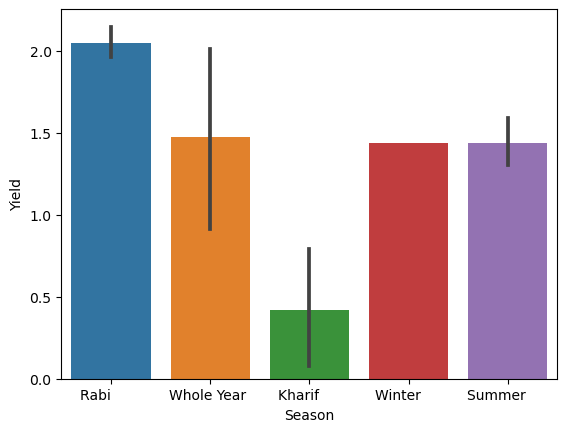

In [30]:
sns.barplot(x = "Season", y = "Yield",data = wheat_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Assam'),
  Text(1, 0, 'Karnataka'),
  Text(2, 0, 'Meghalaya'),
  Text(3, 0, 'West Bengal'),
  Text(4, 0, 'Andhra Pradesh'),
  Text(5, 0, 'Kerala'),
  Text(6, 0, 'Odisha'),
  Text(7, 0, 'Bihar'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Madhya Pradesh'),
  Text(10, 0, 'Maharashtra'),
  Text(11, 0, 'Mizoram'),
  Text(12, 0, 'Punjab'),
  Text(13, 0, 'Uttar Pradesh'),
  Text(14, 0, 'Haryana'),
  Text(15, 0, 'Himachal Pradesh'),
  Text(16, 0, 'Tripura'),
  Text(17, 0, 'Chhattisgarh'),
  Text(18, 0, 'Nagaland'),
  Text(19, 0, 'Uttarakhand'),
  Text(20, 0, 'Jharkhand'),
  Text(21, 0, 'Delhi'),
  Text(22, 0, 'Manipur'),
  Text(23, 0, 'Jammu and Kashmir'),
  Text(24, 0, 'Telangana'),
  Text(25, 0, 'Arunachal Pradesh'),
  Text(26, 0, 'Sikkim')])

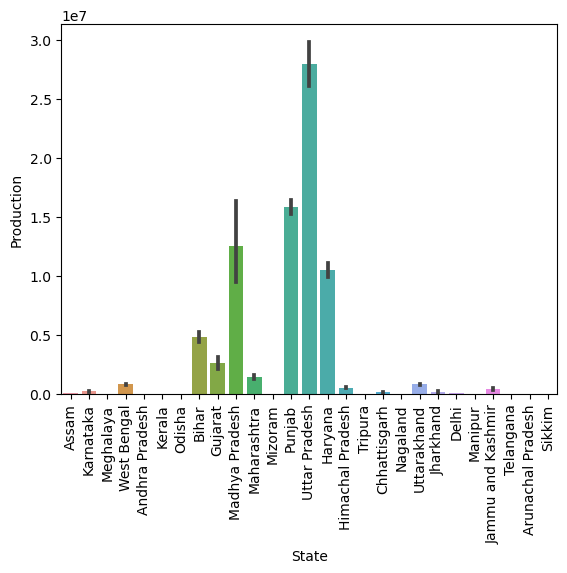

In [31]:
sns.barplot(x = "State",y = "Production",data = wheat_data)
plt.xticks(rotation = 90)

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

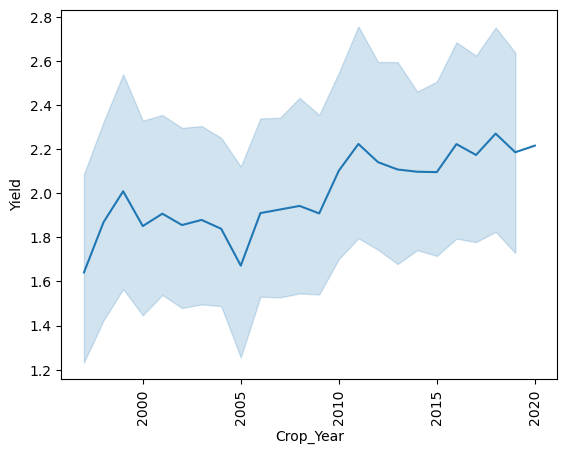

In [32]:
sns.lineplot(x = "Crop_Year",y = "Yield",data=wheat_data)
plt.xticks(rotation=90)

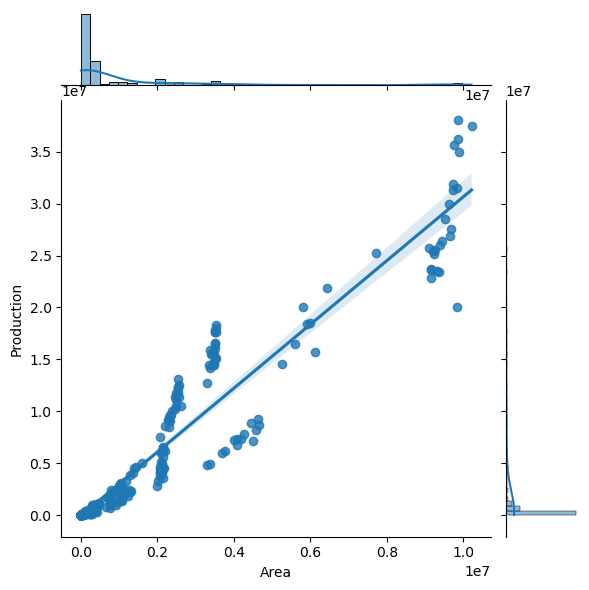

In [33]:
sns.jointplot(x = "Area",y = "Production", data=wheat_data,kind="reg")

In [34]:
# ax = sns.pairplot(crop)

In [35]:
data_without_states = crop.drop(['State', 'Crop', 'Season'], axis = 1)

In [36]:
data_without_states

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,1997,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,1997,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,1997,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,1997,1739.0,794.0,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...
19720,1998,4000.0,2000.0,1498.0,395200.00,1160.00,0.500000
19721,1998,1000.0,3000.0,1498.0,98800.00,290.00,3.000000
19722,1997,310883.0,440900.0,1356.2,29586735.11,96373.73,1.285000
19723,1997,275746.0,5488.0,1356.2,26242746.82,85481.26,0.016667


In [37]:
data_without_states.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.000000,-0.035584,0.003412,-0.011749,0.011207,-0.004596,0.002609
Area,-0.035584,1.000000,0.037448,-0.106019,0.973249,0.973481,0.001868
Production,0.003412,0.037448,1.000000,0.029854,0.039803,0.035179,0.570810
Annual_Rainfall,-0.011749,-0.106019,0.029854,1.000000,-0.109665,-0.097626,0.020745
Fertilizer,0.011207,0.973249,0.039803,-0.109665,1.000000,0.954985,0.002869
Pesticide,-0.004596,0.973481,0.035179,-0.097626,0.954985,1.000000,0.001790
Yield,0.002609,0.001868,0.570810,0.020745,0.002869,0.001790,1.000000


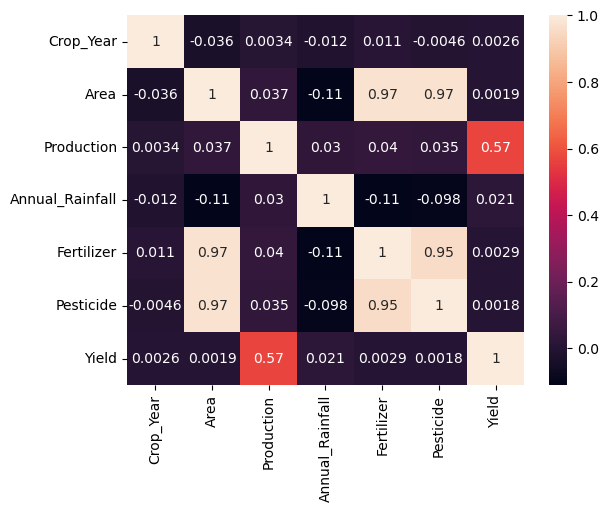

In [38]:
corr_matrix = data_without_states.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [39]:
crop.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909


In [40]:
crop_data = crop.fillna(0, inplace=True)
crop_data = pd.get_dummies(crop, columns=['Crop', 'Season', 'State'])
crop_data['Historical_Yield_Trend'] = np.arange(len(crop_data))

In [41]:
crop_data.head(10)

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,...,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Historical_Yield_Trend
0,1997,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1997,796.0,22.0,2051.4,75755.32,246.76,0.238333,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1997,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1997,1739.0,794.0,2051.4,165500.63,539.09,0.420909,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,1997,13587.0,9073.0,2051.4,1293074.79,4211.97,0.643636,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,1997,2979.0,1507.0,2051.4,283511.43,923.49,0.465455,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,1997,94520.0,904095.0,2051.4,8995468.40,29301.20,9.919565,0,0,0,...,0,0,0,0,0,0,0,0,0,7
8,1997,10098.0,5158.0,2051.4,961026.66,3130.38,0.461364,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,1997,19216.0,14721.0,2051.4,1828786.72,5956.96,0.615652,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [42]:
crop_data.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,...,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Historical_Yield_Trend
count,19704.000000,1.970400e+04,1.970400e+04,19704.000000,1.970400e+04,1.970400e+04,19704.000000,19704.000000,19704.000000,19704.000000,...,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000
mean,2009.122310,1.798443e+05,1.642344e+07,1437.788355,2.409513e+07,4.882709e+04,79.897127,0.008222,0.025782,0.026594,...,0.034003,0.020148,0.011470,0.041717,0.020148,0.022381,0.042123,0.038774,0.055623,9851.500000
std,6.501255,7.325811e+05,2.629571e+08,817.042573,9.491219e+07,2.132160e+05,877.974273,0.090302,0.158487,0.160896,...,0.181242,0.140511,0.106484,0.199948,0.140511,0.147924,0.200876,0.193060,0.229198,5688.199188
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,1.392000e+03,1.390750e+03,940.700000,1.884450e+05,3.573450e+02,0.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4925.750000
50%,2010.000000,9.316500e+03,1.380000e+04,1247.600000,1.236489e+06,2.422380e+03,1.030000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9851.500000
75%,2015.000000,7.504850e+04,1.225365e+05,1643.700000,1.001149e+07,2.001397e+04,2.387579,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14777.250000
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19703.000000
